# IMPORT

In [53]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import matplotlib as mpl
import os
from sklearn.svm import SVR
from sklearn import metrics
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split ,GridSearchCV , RandomizedSearchCV

In [54]:
#matplotlib.rcParams('font.family') = 'tahoma'

In [55]:
url = "https://covid19.ddc.moph.go.th/api/Cases/timeline-cases-by-provinces"
r = requests.get(url)
j = r.json()
cov = pd.DataFrame(j)

In [56]:
dfs = cov.pivot_table(columns="txn_date",index="province", values = "new_case_excludeabroad")

In [5]:
dfa = dfs.iloc[: , -31:]

# SVR

In [57]:
url2 = "https://covid19.ddc.moph.go.th/api/Cases/timeline-cases-all"
d = requests.get(url2)
js = d.json()

ds_raw = pd.DataFrame(js)
ds2 = ds_raw[["txn_date","new_case"]]

In [58]:
ds2.tail()

,txn_date,new_case
329,2022-02-24,23557
330,2022-02-25,24932
331,2022-02-26,25615
332,2022-02-27,24719
333,2022-02-28,22311


In [59]:
ds2 = ds2.reset_index(drop=True)
ds2.shape

(334, 2)

In [60]:
xdf = np.arange(len(ds2))

In [61]:
ydf = ds2["new_case"]
xdf = xdf.reshape(-1,1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split( xdf, ydf, test_size=0.33, random_state=42)

In [74]:
SVR_model = SVR(kernel="rbf" ,C=681818181.8181819, epsilon=1000.0).fit(X_train,y_train)

In [75]:
y_pre = SVR_model.predict(X_train)

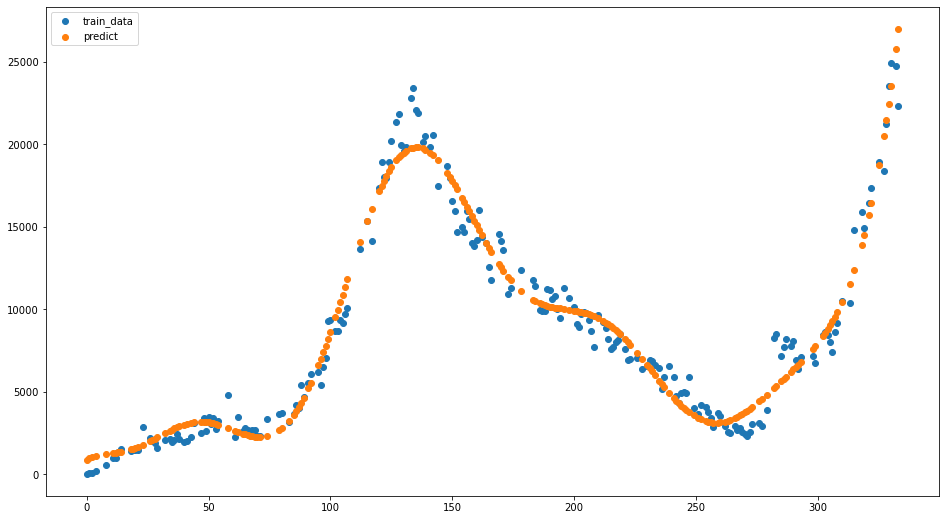

In [76]:
plt.figure(figsize=(16,9))
plt.scatter(x=X_train ,y=y_train ,label="train_data")
plt.scatter(x=X_train ,y=y_pre ,label = "predict" )
plt.legend()

In [77]:
SVR_model.predict([[335]])

array([29596.77829922])

In [78]:
C = list(np.linspace(10000, 100000, 5, dtype = float)),
params = {
    'C':list(np.linspace(100000000, 1000000000, 100, dtype = float)),
    "epsilon":list(np.linspace(1000, 200000, 100, dtype = float)),
    'kernel':["rbf"]}

In [79]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
clf = GridSearchCV(estimator=SVR_model ,
                   n_jobs=-1   ,
                    verbose=50,
                   cv=2 ,
                   scoring="neg_mean_squared_error",
                  param_grid =params,
                   return_train_score=True
                  )

In [80]:
#result = clf.fit(X_train ,y_train)

In [84]:
acc = metrics.r2_score(y_train ,y_pre)
acc * 100

96.69855235705656

In [85]:
result.best_estimator_

SVR(C=681818181.8181819, epsilon=1000.0)

In [86]:
result.best_score_

-1355363.198623668

In [88]:
result.cv_results_

{'mean_fit_time': array([1.12508059, 0.0220027 , 0.00249982, ..., 0.00150001, 0.00150001,
        0.00150025]),
 'std_fit_time': array([5.60041904e-01, 2.38418579e-07, 5.00440598e-04, ...,
        4.99606133e-04, 5.00082970e-04, 5.00082970e-04]),
 'mean_score_time': array([0.00300074, 0.00099981, 0.00150156, ..., 0.00049996, 0.00050008,
        0.00050008]),
 'std_score_time': array([0.00000000e+00, 3.57627869e-07, 5.00679016e-04, ...,
        4.99963760e-04, 5.00082970e-04, 5.00082970e-04]),
 'param_C': masked_array(data=[100000000.0, 100000000.0, 100000000.0, ...,
                    1000000000.0, 1000000000.0, 1000000000.0],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_epsilon': masked_array(data=[1000.0, 3010.10101010101, 5020.20202020202, ...,
                    195979.797979798, 197989.898989899, 200000.0],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',